# ENTREGABLE 4 - Visualización de datos con Python

En este entregable, se utilizarán las librerías de Python 'Pandas', 'Numpy' y 'Matplotlib'.
Se cargará un csv y se modificará y limpiará para facilitar el trabajo sobre el mismo.

### Modificación y limpieza del dataset

In [1]:
#importación de bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#cargado del fichero csv
cars = pd.read_csv('fh_cars.csv', delimiter=',', quotechar='"', header=0)

#limpieza de valor NaN y no encontrados
cars = cars.drop(cars[cars.stock_specs == "info_not_found"].index)
cars = cars.drop(cars[cars.speed == "info_not_found"].index)
cars = cars.drop(cars[cars.acceleration == "info_not_found"].index)
cars = cars.drop(cars[cars.Drive_Type == "info_not_found"].index)
cars = cars.drop(cars[cars.Stock_Rating == "info_not_found"].index)
cars = cars.drop(cars[cars.car_source == "This info will be available soon"].index)

#Borrado de columnas no utilizadas
cars = cars.drop("Top_Speed", axis=1)
cars = cars.drop("0-60_Mph", axis=1)
cars = cars.drop("0-100_Mph", axis=1)
cars = cars.drop("g-force", axis=1)
cars = cars.drop("car_source_1", axis=1)
cars = cars.drop("car_source_2", axis=1)
cars = cars.drop("Car_Image", axis=1)
cars = cars.drop("Name_and_model", axis=1)
cars = cars.drop("In_Game_Price", axis=1)
cars = cars.drop("Horse_Power", axis=1)
cars = cars.drop("Weight_lbs", axis=1)
cars = cars.drop("Model_type", axis=1)

#Modificacion de tipo de datos
cars['acceleration'] = cars['acceleration'].astype(float)
cars['speed'] = cars['speed'].astype(float)
cars['launch'] = cars['launch'].astype(float)
cars['handling'] = cars['handling'].astype(float)
cars['Offroad'] = cars['Offroad'].astype(float)
cars['braking'] = cars['braking'].astype(float)
cars['Stock_Rating'] = cars['Stock_Rating'].astype(float)
cars['stock_specs'] = cars['stock_specs'].astype(str)

### Creación de gráficos tipo tarta

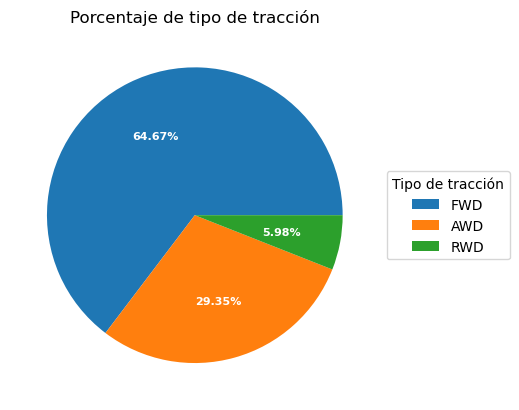

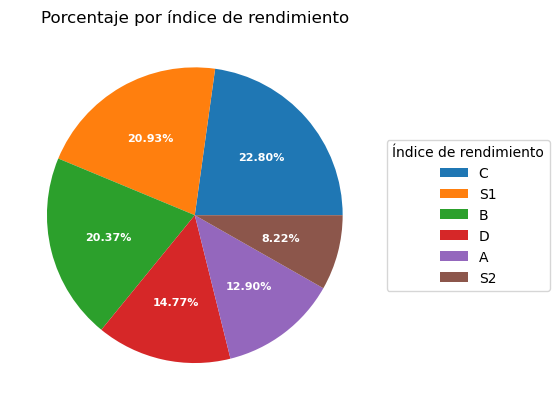

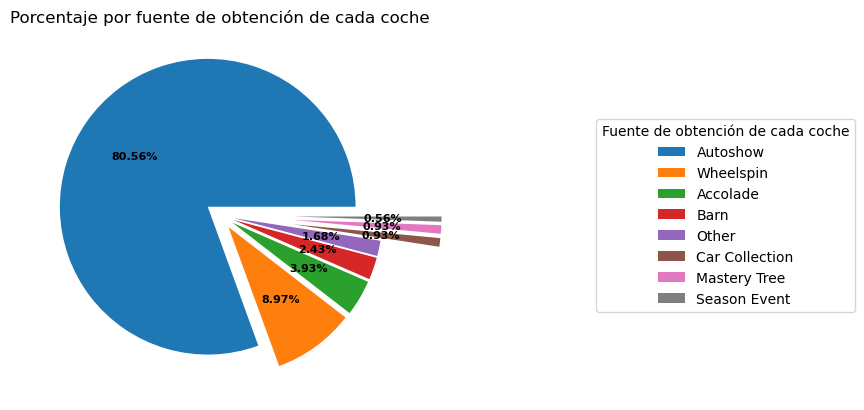

In [37]:
#Gráfico 1

#obtener la cantidad de veces que se repite un valor en la columna
conteo = cars['Drive_Type'].value_counts().tolist()
values = cars['Drive_Type'].unique().tolist()

#Creación del gráfico 1, con porcentajes con 2 decimales y leyenda en un lateral
fig, tarta = plt.subplots(subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = tarta.pie(conteo, autopct=lambda pct: f"{pct:.2f}%", textprops=dict(color="w"))

#leyenda del gráfico
tarta.legend(wedges, values, title="Tipo de tracción", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

tarta.set_title("Porcentaje de tipo de tracción")

plt.show()


# GRÁFICO 2

conteo = cars['stock_specs'].value_counts().tolist()
values = cars['stock_specs'].unique().tolist()


fig, tarta = plt.subplots(subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = tarta.pie(conteo, autopct=lambda pct: f"{pct:.2f}%", textprops=dict(color="w"))

tarta.legend(wedges, values, title="Índice de rendimiento", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

tarta.set_title("Porcentaje por índice de rendimiento")

plt.show()


# GRÁFICO 3

conteo = cars['car_source'].value_counts().tolist()
values = cars['car_source'].unique().tolist()
explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5)


fig, tarta = plt.subplots(subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = tarta.pie(conteo, autopct=lambda pct: f"{pct:.2f}%", textprops={'color' : 'black'}, explode=explode)

tarta.legend(wedges, values, title="Fuente de obtención de cada coche", loc="center left", bbox_to_anchor=(1.5, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

tarta.set_title("Porcentaje por fuente de obtención de cada coche")

plt.show()


### Creación del gráfico de dispersión

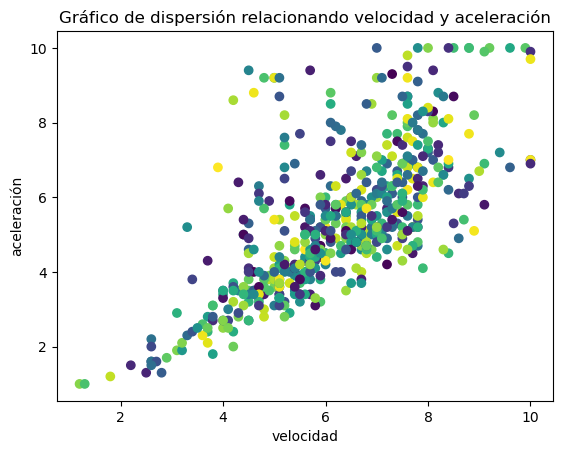

In [3]:
fig, disp = plt.subplots()

#generación de colores
colors = np.random.uniform(15, 80, len(cars["speed"]))

disp.scatter(cars["speed"], cars["acceleration"], c = colors)

plt.xlabel("velocidad")
plt.ylabel("aceleración")

plt.title("Gráfico de dispersión relacionando velocidad y aceleración")

plt.show()

### Creación del gráfico de barras

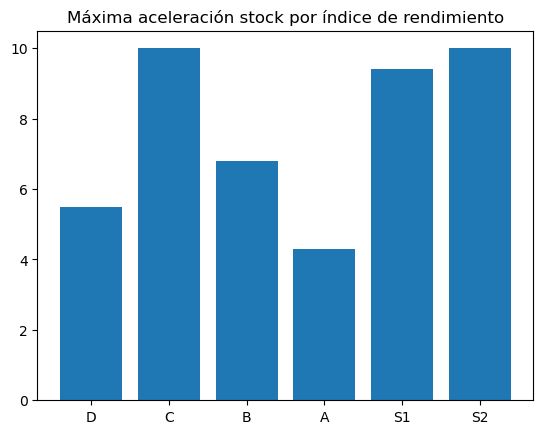

In [2]:
fig, acel = plt.subplots()

orden = ["D", "C", "B", "A", "S1", "S2"]

#orden del eje X
plt.xticks(range(len(orden)), orden)
plt.title("Máxima aceleración stock por índice de rendimiento")

acel.bar(cars["stock_specs"], cars["acceleration"])

plt.show()

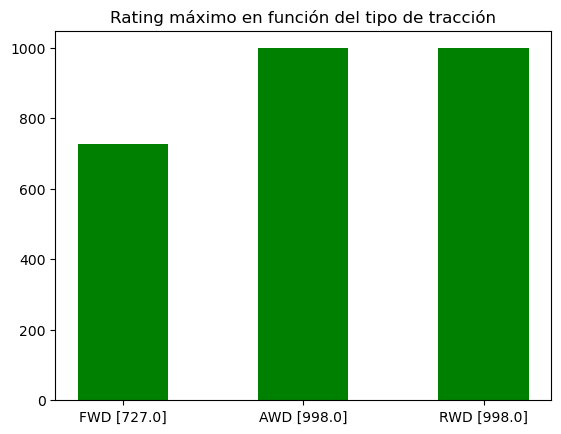

In [3]:
fig, stock = plt.subplots()

stock.bar(cars["Drive_Type"], cars["Stock_Rating"], color="green", width=0.5)

max = []
fwd = cars.loc[cars["Drive_Type"] == "FWD", "Stock_Rating"]
max.append("FWD [" + str(fwd.max()) + "]")
fwd = cars.loc[cars["Drive_Type"] == "AWD", "Stock_Rating"]
max.append("AWD [" + str(fwd.max()) + "]")
fwd = cars.loc[cars["Drive_Type"] == "RWD", "Stock_Rating"]
max.append("RWD [" + str(fwd.max()) + "]")

plt.title("Rating máximo en función del tipo de tracción")

#establecer el eje X y sus valores exactos
stock.set_xticks([0,1,2], max)

plt.show()

### Creación del gráfico de líneas

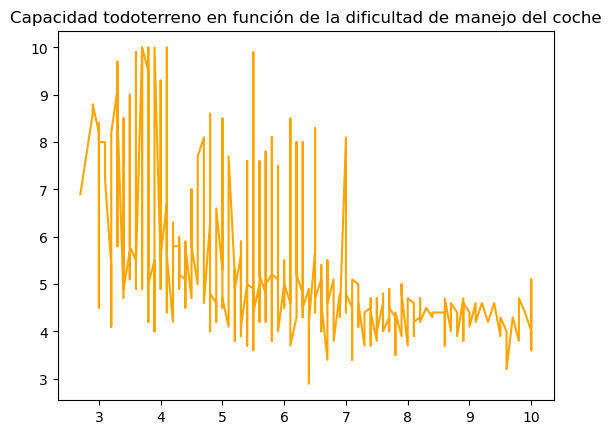

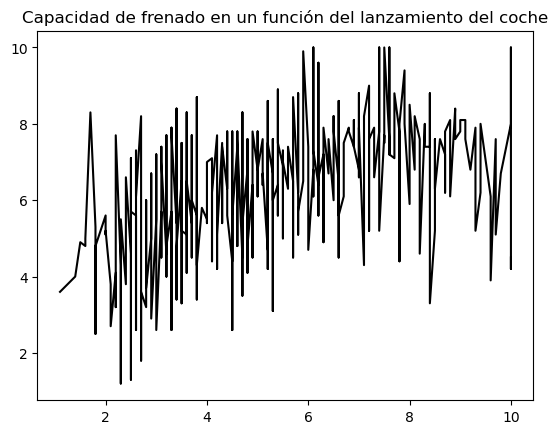

In [6]:
# Gráfico 1
cars = cars.sort_values("handling", ascending=True)

plt.plot(cars["handling"], cars["Offroad"], color="orange")

plt.title("Capacidad todoterreno en función de la dificultad de manejo del coche")

plt.show()


# Gráfico 2

cars = cars.sort_values("launch", ascending=True)

plt.plot(cars["launch"], cars["speed"], color="black")

plt.title("Capacidad de frenado en un función del lanzamiento del coche")

plt.show()

### Creación del gráfico de distribución estadística

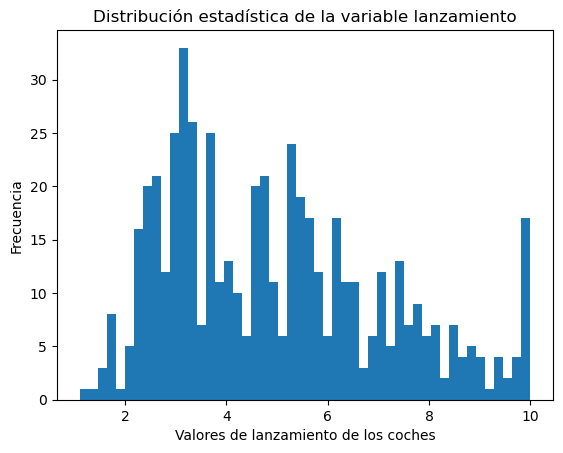

In [7]:
fig, frecuencia = plt.subplots()

#cantidad de valores del gráfico
frecuencia.hist(cars["launch"], 50)

plt.xlabel("Valores de lanzamiento de los coches")
plt.ylabel("Frecuencia")
plt.title("Distribución estadística de la variable lanzamiento")

plt.show()

### Diagrama de tipo caja (box plot)

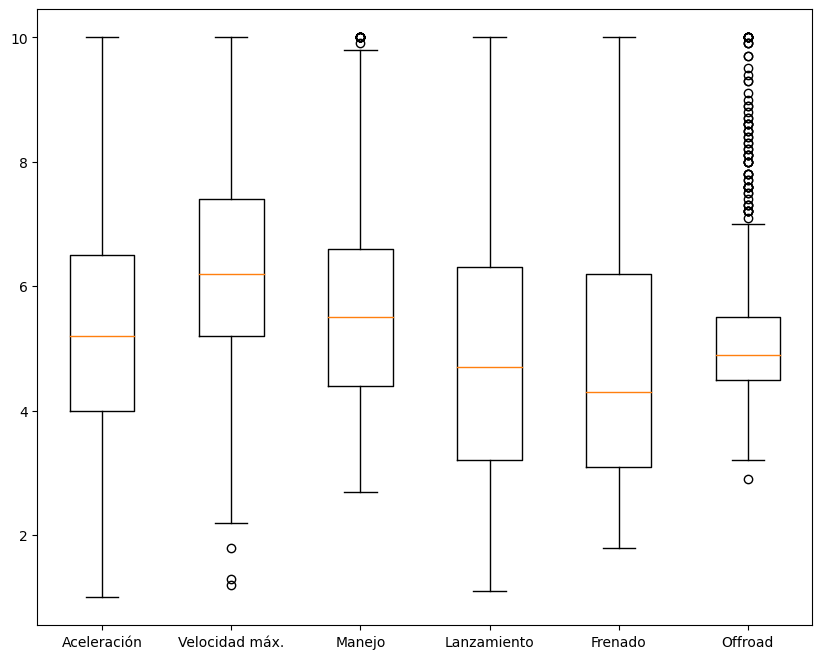

In [8]:
fig, box = plt.subplots(figsize=(10,8))

box.boxplot([cars["acceleration"], cars["speed"], cars["handling"], cars["launch"], cars["braking"], cars["Offroad"]],
            positions=[1,2,3,4,5,6])

box.set_xticks([1,2,3,4,5,6], ["Aceleración", "Velocidad máx.", "Manejo", "Lanzamiento", "Frenado", "Offroad"])

plt.show()